Code to look at the strcuture of a single real network using Trophic Analysis.

It computes the eigenvectors looks at their distrubtions and prints some information about them.

Warning this code mixes Julia Plots and Matplotlib from Python so there is some code which may not run correctly at the end.

To look at a particlar network simply add the relevant path to the data to g and comment out the graph generation which is not needed. This code can also read graphs as .xml files as well as edge lists.

In [1]:
using Graphs, GraphIO, GraphPlot, Plots, SparseArrays




In [2]:
using GraphPlot

In [3]:
#gplot(g, layout=layout=circular_layout)

In [4]:
using LinearAlgebra, IterativeSolvers, Statistics

function get_levels(A)
    
    A= convert(Array{Float64}, A)
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
   
    
    u = w_in + w_out 
    
    v= w_in - w_out 
   
    Lambda=  diagm(u)-  A - transpose(A)
    
   
    Lambda[1,1]= 0 
    
    #h= bicgstabl(Lambda, v, 1)
    #h=  lsmr(Lambda, v)   
    
    h= Lambda \ v
    
    h= h .- minimum(h)
    
    return h
end

get_levels (generic function with 1 method)

In [5]:
function calc_troph_incoh(A)
    
    F=0

    for (x,y,v) in zip(findnz(A)...)
  
    
        F = F + v*(h[y] - h[x] -1 )^2
        println(h[y] - h[x])
    end
    
    F= F/sum(A)
    
end
    
    
    
    
    

calc_troph_incoh (generic function with 1 method)

In [6]:
using SparseArrays




In [53]:
using LinearAlgebra
using Arpack
using Graphs, GraphIO, ParserCombinator, EzXML


N=500

#T_list= LinRange(0.025, 8, number)

#T_list= 10 .^ (range(-2,stop=2,length=number))

#T_list= [100000]

F_list = zeros(0)

num_diff_list= zeros(0)



eig_list= zeros(0)

eig_list_num_abs = zeros(0)

h_max_list= zeros(0)
entropy= zeros(0)
ipr= zeros(0)

entropy_list=zeros(0)
nu_normal_list= zeros(0)

ipr_list= zeros(0)

scale_spec_list = zeros(0)

nu_normal_list= zeros(0)
eigs_vecs =(0,0)
h=zeros(0)
diffs= zeros(0)

A= zeros(0,0)

#stop = 5


#f=open("net_celegans_neural.dat")
#net_moreno_highschool.dat
#Ythan96.dat
#el_verde.dat
#net_trade_basic.dat
#net_MJ.dat
#net_e_coli.dat
#net_green_eggs.dat

#higgs-social_network.edgelist
#web-Stanford.txt
#wiki-Talk.txt
#amazon0312.txt
g = loadgraph("net_celegans_neural.dat", "SimpleDiGraph", EdgeListFormat())
#g= path_digraph(1000)  
#g= erdos_renyi(1000, 10*1000, is_directed=true)
#add_edge!(g, 2, 1 )
#add_edge!(g, 1000, 999 )

#g =watts_strogatz(1000, 5, 0.95, is_directed = true)

file = string("/Users/niallrodgers/OneDrive - University of Birmingham/Julia/Network_data_New/Other/airport_routes.xml")

#z= loadgraphs(file,  GraphIO.GraphML.GraphMLFormat())

#println(z[1])
            
#Require name of graph which can be found from the loadgaphs Dict. Seems like Tiago's nets are all called G
#g = loadgraph(file, "G", GraphIO.GraphML.GraphMLFormat())
        

print(g)


#g = cycle_digraph(20)

#g= barabasi_albert(100, (10), 3, is_directed=true )

#barabasi_albert!(g, 1000, 20) 

N=nv(g)    
A = (adjacency_matrix(g))
print(A)    
L=sum(A)
    

    

        
    
    
    

   
    
    
h = get_levels(A)
    
F= calc_troph_incoh(A)    
append!( F_list, F ) 
    
eigs_vecs = eigvecs(Matrix(A))    
    
#println(maximum(real(eigvals(Matrix(A)))))

eigs_val=  eigvals(Matrix(A))   
    
    
spec_rad=  maximum(real(eigs_val))   
    
scale_fac=   maximum(real(eigvals(Matrix(A)*transpose(Matrix(A)))))  
    
nu= sum(abs2.(eigs_val))/norm(A,2)^2
    
entropy= zeros(0)
ipr= zeros(0)
for k in 1:N
        
        
        vec= abs2.(eigs_vecs[:,k])
        vec = filter(!iszero, vec)
        ent = sum(-vec.*(log.(vec)))
        
        
        vec1= abs.(eigs_vecs[:,k])
        
        ratio= sum(vec1.^4)/(sum(vec1.^2))^2
        
        append!(entropy,ent)
        append!(ipr,ratio)
    end  
        
append!(ipr_list, mean(ipr))
    

append!(entropy_list,mean(entropy)) 
    
append!( eig_list, spec_rad )  
    
    
append!(scale_spec_list, (spec_rad/sqrt(scale_fac)))
    
append!( eig_list_num_abs , maximum(real(eigvals((Matrix(A) + transpose(Matrix(A)))/2))  ))    
   
append!(h_max_list, maximum(h))  
    
    
append!(nu_normal_list, nu)
 
diffs= zeros(0)

#edges_1= []
#edges_2=[]

for (x,y,v) in zip(findnz(A)...)
  
    
        d= (h[y] - h[x] )
    
        append!( diffs, d )
    
       
        
    
        
    end    
   
 #num_diff=  count(p->(p>= 0), diffs)    
    
    num_diffs= sum(diffs .<= 0)/length(diffs)
    #num_diffs= 1
append!( num_diff_list, num_diffs )
    
F_round= round(F, digits=3)    
#display(plot(eigs(A,nev=500)[1], seriestype = :scatter, label = false ,  title="F = $F_round"))  

println(N)
println(sum(abs.((A)*eigs_vecs[:,5] - eigs_val[5]*eigs_vecs[:,5])))
g= SimpleDiGraph((A))
println(indegree(g))
println(is_connected(g))
println(F_list)
println(sum(A))
F_round= round(F_list[1], digits=3)
println(h)

SimpleDiGraph{Int64}(2345, [[2, 51, 72, 77, 78, 90, 92, 158, 159], [69, 71, 77, 89, 91, 113, 158], [9, 17, 21, 23, 31, 47, 78, 93, 94, 121, 125, 131], [10, 16, 18, 22, 24, 32, 60, 77, 93, 94, 97, 122, 126, 132, 295], [7, 23, 101, 222, 296], [24, 102, 296], [5, 27, 78, 99, 100, 101, 102, 121, 296], [6, 26, 44, 77, 99, 100, 101, 102, 121, 122, 296], [7, 23, 37, 121, 296], [8, 16, 24, 122, 296], [5, 19, 23, 26, 27, 29, 69, 91], [6, 24, 25, 26, 27, 30, 41, 94, 118], [7, 19, 21, 27, 28, 43, 77, 93, 99, 100, 118, 143], [8, 18, 20, 22, 26, 28, 32, 34, 99, 118, 144], [2, 9, 21, 23, 26, 27, 28, 31, 89, 118], [10, 22, 24, 26, 27, 28, 32, 44, 90, 118], [3, 9, 26, 35, 40, 78, 91, 99, 101, 108, 121, 122, 128, 139, 140], [4, 6, 10, 14, 27, 41, 77, 78, 92, 99, 100, 102, 107, 108, 122, 139, 140], [94, 122, 133], [93, 94, 121, 126, 134], [9, 15, 23, 93, 102, 105, 118], [10, 16, 24, 27, 94, 101, 106, 118], [19], [20], [91, 92, 296], [296], [296], [140, 296], [5, 23, 26, 122, 296], [24, 25, 27, 36, 102, 

296], [238, 247, 279, 280, 296], [239, 247, 281, 282, 296], [187, 189, 274, 275, 296], [228, 245, 246, 276, 277, 278, 279, 296], [229, 230, 246, 247, 277, 278, 279, 280, 296], [231, 232, 247, 248, 278, 279, 280, 281, 296], [189, 233, 248, 279, 280, 281, 282, 296], [186, 189, 225, 274, 275, 281, 282, 296], [235, 276, 277, 296], [236, 278, 279, 296], [238, 280, 281, 296], [239, 274, 282, 296], [248, 250, 296], [189, 195, 274, 275, 296], [153, 168, 169, 252, 296], [153, 169, 245, 253, 276, 296], [245, 254, 277, 296], [246, 255, 277, 278, 296], [246, 256, 296], [247, 257, 279, 280, 296], [247, 258, 296], [248, 249, 281, 282, 296], [189, 248, 296], [189, 195, 296], [245, 296], [245, 246, 296], [246, 296], [246, 247, 296], [247, 296], [247, 248, 296], [248, 296], [153, 168, 178, 269, 296], [168, 178, 245, 277, 296], [117, 153, 168, 169, 178, 194, 221, 245, 246, 247, 268, 269, 271, 276, 277, 278, 279, 280, 296], [147, 148, 199, 200, 247, 272, 296], [147, 148, 199, 200, 270, 271, 296], [117, 1

 [147, 148, 186, 187, 188, 189, 239, 244, 250, 273], [73, 74, 77, 78, 151, 152, 167, 218, 219, 227, 228, 234, 235, 240, 245, 252, 270], [151, 152, 218, 219, 228, 229, 235, 236, 240, 241, 245, 253, 254, 269, 270], [152, 229, 230, 236, 240, 241, 242, 246, 254, 270], [230, 231, 236, 237, 240, 241, 242, 243, 246, 256, 270], [231, 232, 237, 241, 242, 243, 247, 256, 270, 273], [232, 233, 238, 242, 243, 244, 247, 258, 273], [225, 233, 238, 243, 244, 248, 258, 273], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], Int64[], [4, 39, 53, 54, 111, 112, 118, 173, 220, 221], [5, 6, 7, 8, 9, 10, 25, 26, 27, 28, 29, 30, 31, 32, 42, 95, 96, 97, 98, 99, 100, 101, 102, 107, 108, 117, 121, 122, 123, 124, 125, 126, 135, 136, 137, 138, 139, 140, 146, 147, 148, 150, 151, 152, 153, 160, 161, 165, 166, 167, 168, 169, 177, 178, 186, 187, 188, 189, 190, 191, 195, 196, 197, 199, 218, 219, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 2

, 43, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 48, 48, 48, 49, 49, 49, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 60, 60, 60, 60, 61, 61, 61, 62, 62, 62, 62, 62, 62, 63, 65, 65, 66, 66, 67, 67, 67, 67, 67, 67, 67, 67, 67, 68, 68, 68, 69, 69, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72

, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

0.9493259028650213
0.6973270593743774
0.5935712562378836
1.1401418449706053
1.2125851562306602
0.22063119147567645
1.0214305510887223
0.12025015529471328
0.01149495016001345
0.2333252474887011
0.8771222593146024
0.4587347281163965
0.5830410926759371
0.799818084832068
0.2254316433586374
0.2533916751047669
0.42366368391539355
0.7911975702812091
0.43532210584414877
0.9277711869821066
0.5932394906780507
0.5256269650845338
1.0695118217783628
0.9189164978013469
1.0262157282707611
1.0186660762294104
0.8569631688329467
1.0238054193149888
1.1567658341822344
0.9287065608533317
0.8467338501327266
0.6284907531665072
0.5792533323502131
0.49795757061475543
0.4911107911480199
0.5374878908785856
1.0748969936751163
0.8910961447184449
0.5820763060778702
1.2010902060706468
0.12187643396986436
0.9663219123225707
0.16269070573725464
-0.01149495016001345
0.19614043591810204
0.9284193799083178
0.44723977795638303
0.5715461425159236
0.8708667863656538
0.13898024043241874
0.21393669319862396
0.2418967249447534

0.49805899093381534
0.4860948946499839
0.7424683757918578
1.058804103584615
-0.17234144120218264
0.6630078449861614
0.3505343858821003
0.3654145360833382
-0.05552888329822103
0.3207288980615375
0.15324546249762538
0.26183155146546166
0.2318230920002171
-0.3175939370840215
0.027560738520812533
0.5443635439578856
0.039249494564516096
-0.24902107260656114
0.46083641930648134
-0.28053602254986476
0.19110418466195167
-0.125171303249338
0.22606812555840528
1.1456172851530046
0.4047906333893584
0.06541946068513882
0.0780112192956115
0.813669800039754
-0.08049601564302256
-0.8619574810419071
-0.5443635439578856
-0.40887916665039564
-0.1730272594169966
0.2117069321955627
-0.47776448226291524
0.41194068341145096
0.24445724784753886
0.8081948786352529
0.9008247702637716
0.11877252387072601
0.1313642824811987
0.231315775229064
0.17784025762639288
0.40732023313062404
0.23983679756671195
-0.05101348998966593
0.5295925775086621
0.12674383220037178
-0.17027200881062665
-0.6637014549665321
0.4074546805

0.7719904219112776
0.013535431474797965
-0.3022978428628078
-0.7981278994177807
-0.3066840616675526
-0.24470666776117622
-0.39192157774098146
0.002610903614150395
0.08106775764235596
-0.06481969963418077
0.19855516614646906
-0.014214162420939314
-0.2731663775042459
-0.02368834948612042
0.0782749316830198
0.06481969963418077
0.18113871976499318
0.982355678316122
0.04375875774650595
0.09013585747707165
0.007597785008661817
-0.007597785008661817
-0.28706321526677026
-0.19594426253231867
-0.19855516614646906
-0.26337486578064984
-0.15628487788185974
0.02816313657306657
0.5159592248590734
0.5698947254616282
0.6290343170530612
0.6033444556424756
0.41811996162964293
0.2232622207676047
0.6386617529116732
0.692597253514228
0.751736845105661
0.7260469836950754
1.5879234193953227
0.12270252805259974
-0.30331852988539376
0.5408224896822427
1.1668494538641165
2.016645038170754
-0.1387873782899609
0.6625694151639612
0.716504915766516
0.775644507357949
0.7499546459473634
0.14661019030488776
0.0239076

0.7580635384441723
0.6599531877741591
0.6531064083074236
-0.004386218804744768
-0.13042781557659033
0.9692675632644436
0.7981278994177807
0.9709431597875258
0.9329801642212514
0.4958300565549729
0.49144383775022815
0.3066840616675526
0.4794993220372976
0.44153632647102325
0.37183964983944073
-0.4363509138065129
-0.06451126396707219
0.10598407567477475
-0.06515558817188816
0.06451126396707219
-0.3098622559330644
0.8301508393302348
0.6164098528558117
0.5686609329876742
1.0534130600978395
0.48369281228218686
0.8032844267451287
1.638870530939777
1.7040446404718277
1.6364321148783108
0.7150960802294168
0.5923935521768171
0.5684858899245291
0.28907502229142334
0.4536061738868562
0.9383583009970216
0.6882296676443107
1.523815771838959
0.9518323100367896
0.963327260196803
0.9477302290680736
0.9541961291139907
1.067695969391203
0.8022602759095045
0.6809938848487769
1.782364860212893
1.7444018646466186
0.12528295713382587
0.257331700868467
0.38501794239781173
0.23570126754496545
0.59065308710741

In [54]:
eigs_val= eigvals(Matrix((A)))

#plot(real.(eigs), imag.(eigs), seriestype = :scatter, label = false ,  title="F = $F_round")

#plot(eigs_val, seriestype = :scatter, label = false ,  title="F = $F_round")

#savefig("Julia_low_mid_T_eigs_Bicon_4.pdf")

297-element Vector{ComplexF64}:
 -3.2926697715196696 + 0.0im
 -3.1779664620599886 + 0.0im
 -2.6994524070111963 - 0.4997651189501404im
 -2.6994524070111963 + 0.4997651189501404im
 -2.5670272156443046 - 0.04333290236039674im
 -2.5670272156443046 + 0.04333290236039674im
 -2.4389907259438752 - 1.1503093295269484im
 -2.4389907259438752 + 1.1503093295269484im
  -2.404214814475936 - 0.5300977328364075im
  -2.404214814475936 + 0.5300977328364075im
 -2.1974908535488638 + 0.0im
 -2.0718346787863506 - 0.5845376722821869im
 -2.0718346787863506 + 0.5845376722821869im
                     ⋮
  2.5660571490426873 + 1.412125017167055im
   2.716229740890242 - 0.4400010606180352im
   2.716229740890242 + 0.4400010606180352im
  3.0776779908321634 + 0.0im
  3.3003054220250005 + 0.0im
  3.3859982703035367 - 0.4713193308338993im
  3.3859982703035367 + 0.4713193308338993im
  3.9657908335563485 + 0.0im
   4.037642805207966 + 0.0im
   5.389101267614057 + 0.0im
  5.6664911372724145 + 0.0im
     9.1507283440054 + 

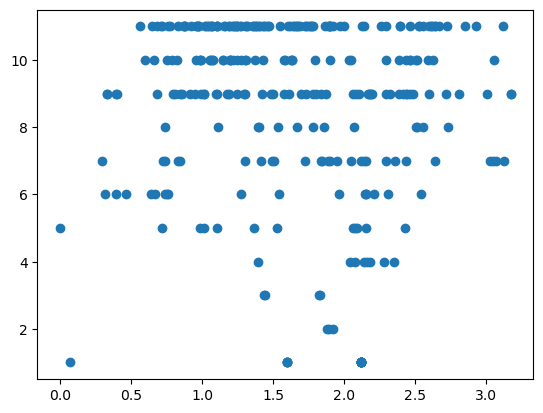

PyObject <matplotlib.collections.PathCollection object at 0x7f9e7da4e6a0>

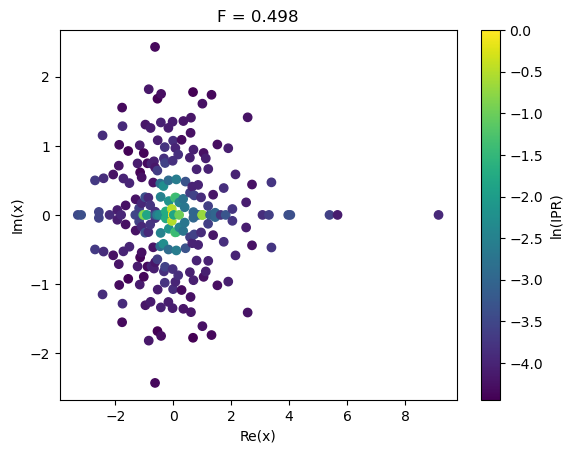

PyObject Text(0.5, 1.0, 'F = 0.498')

In [56]:

x=real.(eigs_val)

y=imag.(eigs_val)

using PyPlot

PyPlot.scatter(x,y, c=log.(ipr))

cbar= plt.colorbar()

cbar.set_label("ln(IPR)")

plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.title("F = $F_round")

#plt.savefig("IPR_yeast_genetic.dat.pdf")

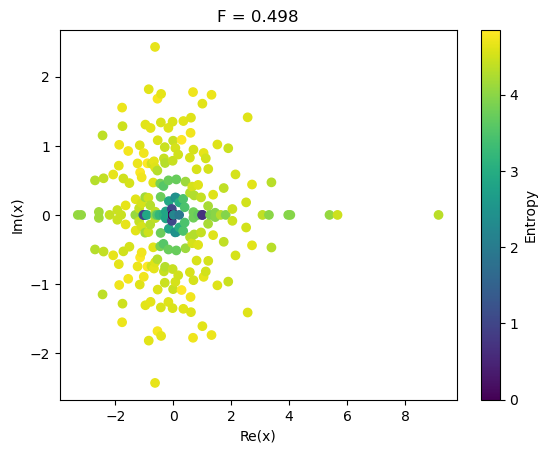

PyObject Text(0.5, 1.0, 'F = 0.498')

In [57]:
x=real.(eigs_val)

y=imag.(eigs_val)

#using PyPlot

PyPlot.scatter(x,y, c=entropy)

cbar= plt.colorbar()

cbar.set_label("Entropy")

plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.title("F = $F_round")

#plt.savefig("Ent_metabolic.pdf")

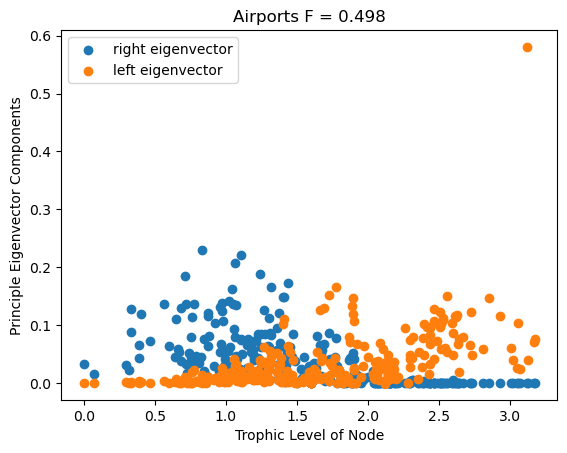

PyObject <matplotlib.legend.Legend object at 0x7f9e7e940fa0>

In [58]:
eigs_vecs[:,N]

x=h

y=abs.(real.(eigs_vecs[:,N]))


y2= abs.(eigvecs(Matrix(transpose(A)))[:,N])
using PyPlot

PyPlot.scatter(x,y, label="right eigenvector")
PyPlot.scatter(x,y2, label ="left eigenvector")
plt.ylabel("Principle Eigenvector Components")
plt.xlabel("Trophic Level of Node")
plt.title("Airports F = $F_round")
plt.legend(loc="best")
#plt.savefig("random_graph_left_right_eigenvector.pdf")

In [59]:
eig_corr= sum(eigenvector_centrality(g).*(eigenvector_centrality(SimpleDiGraph(((transpose(A)))))))

0.2781138606254913

In [78]:
alpha = 1/eig_list[1] - 0.001
g_trans= SimpleDiGraph(transpose(A))

katz_cent= katz_centrality(g, alpha)


PyPlot.scatter(h,katz_cent , label="Katz")
katz_cent_trans= katz_centrality(g_trans, alpha)
PyPlot.scatter(h,katz_cent_trans, label="Katz Transpose")
plt.ylabel("Katz Centrality")
plt.legend(loc="best")
plt.xlabel("Trophic Level of Node")
plt.title("F = $F_round")
#plt.savefig("smalleworld_katz_2.png")

LoadError: BoundsError: attempt to access 0-element Vector{Float64} at index [1]

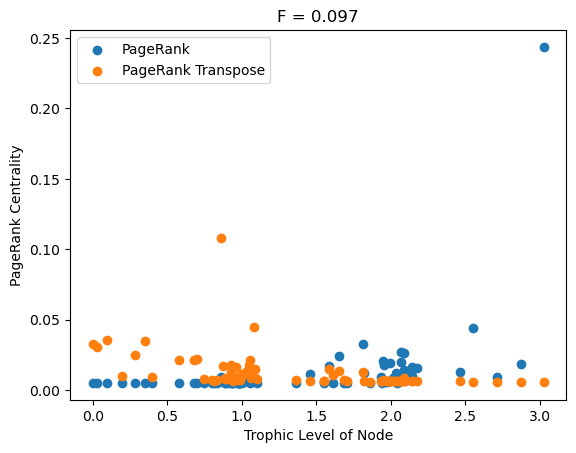

PyObject Text(0.5, 1.0, 'F = 0.097')

In [14]:
pagerank_cent= pagerank(g, 0.85, 100, 1.0e-10)


PyPlot.scatter(h,pagerank_cent, label="PageRank")
pagerank_cent_trans= pagerank(g_trans, 0.85, 100, 1.0e-10)
PyPlot.scatter(h,pagerank_cent_trans, label="PageRank Transpose")
plt.ylabel("PageRank Centrality")
plt.xlabel("Trophic Level of Node")
plt.legend(loc="best")
plt.title("F = $F_round")
#plt.savefig("smallworld_pageRank_2.png")

false


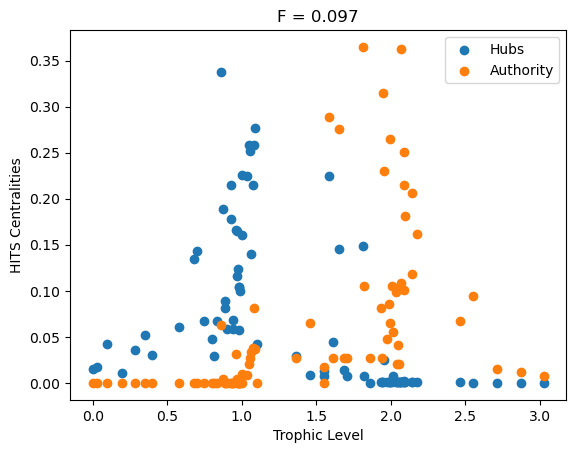

PyObject Text(0.5, 24.0, 'Trophic Level')

In [15]:

hits = abs.(eigvecs(Matrix(A*transpose(A)))[:,N])
#authority = transpose(A)*(eigvecs(Matrix(A*transpose(A)))[:,500])
authority= abs.(eigvecs(Matrix(transpose(A)*(A)))[:,N])
println(A==transpose(A))
PyPlot.scatter(h,hits , label="Hubs")
PyPlot.scatter(h,authority , label="Authority")
plt.legend(loc="best")
plt.title("F = $F_round")
plt.ylabel("HITS Centralities")
plt.xlabel("Trophic Level")
#plt.savefig("smallworld_HIts_2.png")

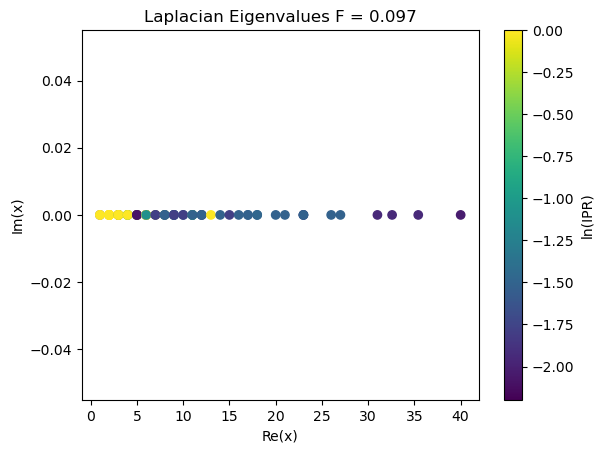

PyObject Text(0.5, 1.0, 'Laplacian Eigenvalues F = 0.097')

In [16]:
A= convert(Array{Float64}, A)

w_in = vec(sum(A, dims=1))
   
w_out= vec(sum(A, dims=2))
    
u = w_in + w_out 
L =  diagm(u)-  A       
eigs_val_L= eigvals(((L)))
eigs_vecs_L = eigvecs(Matrix(A)) 

entropy_L= zeros(0)
ipr_L= zeros(0)
for k in 1:N
        
        
        vec= abs2.(eigs_vecs_L[:,k])
        vec = filter(!iszero, vec)
        ent = sum(-vec.*(log.(vec)))
        
        
        vec1= abs.(eigs_vecs_L[:,k])
        
        ratio= sum(vec1.^4)/(sum(vec1.^2))^2
        
        append!(entropy_L,ent)
        append!(ipr_L,ratio)
    end 

x=real.(eigs_val_L)

y=imag.(eigs_val_L)

#using PyPlot

PyPlot.scatter(x,y, c=log.(ipr_L))

cbar= plt.colorbar()

cbar.set_label("ln(IPR)")

plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

plt.title("Laplacian Eigenvalues F = $F_round")
#plt.savefig("Lapacian_IPR_el_verde.pdf")    
#plot(eigs_val, seriestype = :scatter, label = false ,  title="F = $F_round")

In [17]:
(eigs(A,nev=500)[1], seriestype = :scatter, label = false ,  title="F = $F_round")

#savefig("Arpack_Eigen_julia.pdf")

LoadError: syntax: invalid named tuple element "eigs(A, nev = 500)[1]" around In[17]:1

In [18]:
eig_cent= eigenvector_centrality(g)
deg_cent= degree_centrality(g)
in_cent= indegree_centrality(g)
out_cent=outdegree_centrality(g)
bet_cent=betweenness_centrality(g)
katz_cent= katz_centrality(g, 0.3)

pagerank_cent= pagerank(g, 0.85, 100, 1.0e-6)

82-element Vector{Float64}:
 0.005151960832617119
 0.005151960832617119
 0.005151960832617119
 0.005151960832617119
 0.005151960832617119
 0.005151960832617119
 0.00569928862984304
 0.005151960832617119
 0.005151960832617119
 0.005151960832617119
 0.005151960832617119
 0.005151960832617119
 0.005151960832617119
 ⋮
 0.012242518461896317
 0.019566200827048456
 0.0096246592916758
 0.012675555189225227
 0.010340091018426558
 0.006936087192086688
 0.005531618030393497
 0.04391460921985618
 0.005391792335213807
 0.01840648769238494
 0.009138699383456947
 0.24368451321747645

In [19]:
pr =  pagerank(g, 0.85, 100, 1.0e-6)

pr = filter(!iszero, pr)
    
#pr = pr*(1/(sum(pr)))
ent_pr = sum(-pr.*(log.(pr)))/log(N)

0.8434854468058633

In [20]:
plot(h,in_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel="In Degree Centrality", label=false, title="F = $F_round")


#savefig("Path_in_degree.pdf")
#savefig("in_deg_cent_high_julia.pdf")





LoadError: UndefVarError: plot not defined

In [21]:
plot(h,out_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel="Out Degree Centrality", label=false, title="F = $F_round")


#savefig("Path_out_degree.pdf")
#savefig("out_deg_cent_high_julia.pdf")


LoadError: UndefVarError: plot not defined

In [22]:
plot(h,in_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel=" Degree Centrality", label=false, title="F = $F_round")


#savefig("Path_degree.pdf")
#savefig("deg_cent_high_julia.pdf")

LoadError: UndefVarError: plot not defined

In [23]:
plot(h,eig_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel="Eigenvector Centrality", label=false, title="F = $F_round")


#savefig("Path_eigenvector.pdf")
#savefig("Eigen_cent_Food_web_pdf")

LoadError: UndefVarError: plot not defined

In [24]:


plot(h,bet_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel=" Betweeness Centrality", label=false, title="F = $F_round")


#savefig("Path_betweeness.pdf")
#savefig("bet_deg_cent_high_julia.pdf")

LoadError: UndefVarError: plot not defined

In [25]:
plot(h,pagerank_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel=" Pagerank", label=false, title="F = $F_round")


#savefig("Path_pagerank.pdf")
#savefig("pagerannk_deg_cent_high_julia.pdf")

LoadError: UndefVarError: plot not defined

In [26]:
plot(h,katz_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel=" Katz", label=false, title="F = $F_round")


#savefig("Path_katz.pdf")
#savefig("katz_deg_cent_high_julia.pdf")

LoadError: UndefVarError: plot not defined

In [27]:
plot(h,seriestype = :scatter, ylabel="Trophic Level", xlabel=" Node Label", label=false,)

#savefig("Path_trophic_level.pdf")

LoadError: UndefVarError: plot not defined

In [28]:
using Arpack
typeof(eigs)
eigs_val= eigvals(Matrix((A)))

#plot(real.(eigs), imag.(eigs), seriestype = :scatter, label = false ,  title="F = $F_round")

plot(eigs_val, seriestype = :scatter, label = false ,  title="F = $F_round")

LoadError: UndefVarError: plot not defined

In [29]:
using Plots

#histogram(diffs, xlabel= "Level Differences", ylabel="Frequency", title=(string("N=1000 k=10 F=",  string(round(F,digits = 3) ))))

#savefig("Generated_Level_distribution_high.pdf")

In [30]:
using Plots

plot(T_list,F_list, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation")

#savefig("Julia_generation_2.pdf")

LoadError: UndefVarError: plot not defined

In [31]:

using Polynomials

x=F_list

y= num_diff_list


plot(F_list, num_diff_list, seriestype = :scatter, legend = :topleft, xlabel= "Trophic Incoherence",

ylabel="Fraction of Negative Edges", title= "Fraction of Negative Edges N=500 k=20", label= "Networks")



#savefig("NegativeEdges_N=500.pdf")


LoadError: UndefVarError: plot not defined

In [32]:
#println(eig_list)

plot(F_list, eig_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Abscissa of Networks", title= "Spectral Properties", label= "Spectral" )

plot!(F_list, eig_list_num_abs, seriestype = :scatter, label = "Numerical")
#savefig("Abscissa_of_Networks.pdf")

LoadError: UndefVarError: plot not defined

In [33]:
plot(F_list, eig_list_num_abs -eig_list , seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Numerical
Abscissa Minus Spectral Radius", title= "Measures of Non-Normality")
#savefig("Difference_of__Abscissa_of_Networks.pdf")

LoadError: UndefVarError: plot not defined

In [34]:
plot(F_list, h_max_list, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Maximum Trophic Level with min at zero", title= "Level Distrubution", label= "Spectral" )

#savefig("Maximum_Level_Numerical_Networks.pdf")



LoadError: UndefVarError: plot not defined

In [35]:
plot(F_list, scale_spec_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Scaled Spectral Radius", title= "Spectral Properties", label= "Networks Generated" )

F_plot= LinRange(0, 1, 1000)

plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))/2), label= "exp((1 - 1/F)/2)", lw=3)

#savefig("scaled_spec_radius_good.pdf")

LoadError: UndefVarError: plot not defined

In [36]:
plot(F_list, nu_normal_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Normality, nu", title= "Normality", label= "Networks Generated" )



plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))), label= "exp((1 - 1/F))", lw=3)

#savefig("nu_normlity_N=500_k=20,pdf")

LoadError: UndefVarError: plot not defined

In [37]:
greedy_color(g; sort_degree=false, reps = 10)


LoadError: ArgumentError: graph must not have self loops

In [38]:
g2 = path_digraph(1000)
#add_edge!(g2, 381, 54)

add_edge!(g2, 500, 300)



A= (adjacency_matrix(g2))

#print(A)
e= eigvals(Matrix((A)))

plot(e, seriestype = :scatter, label = false )

#savefig("Path_with_1_short_middle_cycle_eigs_julia.pdf")

LoadError: UndefVarError: plot not defined

In [39]:
g2= cycle_digraph(1000)

A= (adjacency_matrix(g2))

#print(A)
e= eigvals(Matrix((A)))

plot(e, seriestype = :scatter, label = false )

#savefig("Cyclce_eigenvalues_julia.pdf")


LoadError: UndefVarError: plot not defined

In [40]:
g2= watts_strogatz(1000, 10, 0.8, is_directed = true)


A= (adjacency_matrix(g2))

#print(A)
e= eigvals(Matrix((A)))

plot(e, seriestype = :scatter, label = false )


#savefig("Small_world_eiges_julia_n_1000_k_10_beta_0.8.pdf")

LoadError: UndefVarError: plot not defined

In [41]:
g2= barabasi_albert(1000,  100, is_directed=true, seed=123)


A= (adjacency_matrix(g2))
println(A)
#print(A)
e= eigvals(Matrix((A)))
print(e)
plot(e, seriestype = :scatter, label = false )

sparse([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 127, 131, 132, 133, 134, 137, 138, 140, 141, 143, 144, 146, 148, 153, 154, 155, 158, 159, 160, 163, 164, 168, 169, 170, 171, 173, 175, 178, 183, 187, 190, 192, 193, 195, 197, 202, 204, 208, 212, 213, 214, 216, 217, 222, 226, 227, 228, 231, 236, 238, 240, 243, 246, 253, 254, 256, 260, 267, 271, 273, 277, 283, 296, 303, 310, 314, 318, 322, 323, 324, 328, 331, 337, 342, 346, 351, 369, 371, 394, 407, 425, 426, 429, 431, 437, 447, 462, 471, 476, 479, 482, 491, 492, 493, 494, 495, 501, 504, 519, 523, 531, 532, 557, 559, 565, 567, 573, 598, 609, 626, 631, 632, 633, 634, 641, 650, 658, 662, 667, 672, 680, 685, 708, 734, 735, 745, 747, 754, 756, 778, 779, 780, 791, 805, 830, 832, 833, 836, 859, 862, 867, 869, 885, 887, 890, 907, 913, 920, 924, 948, 973, 981, 990, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 124, 125, 126, 12

 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 131, 133, 135, 137, 138, 139, 140, 142, 143, 144, 150, 154, 156, 157, 158, 159, 160, 165, 166, 168, 173, 175, 178, 185, 186, 187, 190, 192, 193, 197, 198, 199, 201, 202, 203, 206, 208, 210, 213, 215, 216, 219, 221, 223, 228, 232, 238, 240, 241, 243, 245, 252, 254, 255, 257, 258, 259, 260, 262, 264, 267, 271, 273, 274, 275, 277, 283, 286, 289, 297, 303, 304, 307, 310, 314, 318, 319, 321, 323, 329, 330, 336, 337, 338, 344, 349, 352, 357, 362, 367, 368, 369, 377, 384, 387, 399, 407, 408, 410, 416, 418, 430, 432, 438, 450, 453, 454, 458, 462, 466, 468, 469, 470, 475, 477, 484, 493, 494, 499, 501, 516, 517, 518, 527, 531, 532, 544, 568, 571, 584, 588, 593, 599, 600, 604, 606, 620, 621, 631, 644, 646, 648, 649, 652, 670, 682, 688, 697, 716, 726, 728, 740, 741, 744, 751, 757, 760, 771, 777, 779, 780, 787, 790, 815, 823, 829, 832, 841, 867, 887, 894, 901, 905, 913, 916, 923, 927, 954, 962,

, 198, 199, 200, 201, 203, 205, 206, 207, 209, 210, 213, 216, 218, 221, 222, 223, 225, 228, 230, 234, 235, 237, 238, 240, 249, 253, 255, 256, 261, 266, 268, 269, 274, 280, 293, 296, 297, 301, 307, 309, 313, 314, 315, 316, 325, 335, 339, 340, 342, 344, 349, 358, 360, 363, 364, 367, 368, 383, 384, 390, 393, 408, 417, 423, 429, 432, 433, 434, 442, 445, 454, 457, 461, 465, 467, 471, 474, 486, 487, 488, 492, 495, 501, 502, 506, 525, 530, 533, 537, 538, 539, 542, 545, 556, 559, 562, 563, 566, 571, 578, 581, 589, 605, 609, 614, 620, 622, 623, 643, 646, 647, 660, 663, 680, 687, 689, 714, 718, 720, 722, 738, 744, 745, 751, 758, 767, 775, 781, 789, 800, 804, 813, 840, 846, 853, 854, 865, 866, 873, 887, 898, 914, 915, 918, 919, 924, 929, 934, 938, 940, 946, 949, 953, 957, 979, 984, 992, 101, 102, 103, 105, 106, 107, 108, 109, 111, 113, 114, 115, 116, 117, 118, 119, 120, 123, 124, 125, 127, 128, 129, 130, 132, 134, 136, 137, 138, 139, 140, 141, 142, 144, 146, 147, 148, 149, 151, 152, 154, 160, 161

, 166, 168, 171, 172, 173, 175, 177, 178, 179, 184, 185, 187, 188, 189, 190, 191, 194, 197, 200, 203, 204, 206, 207, 210, 212, 215, 216, 218, 221, 222, 226, 235, 236, 238, 241, 248, 249, 251, 253, 260, 266, 269, 270, 271, 276, 279, 285, 289, 296, 297, 298, 301, 304, 309, 315, 319, 322, 328, 329, 331, 333, 335, 338, 339, 342, 348, 353, 354, 362, 364, 366, 370, 372, 385, 388, 396, 397, 398, 400, 401, 404, 407, 420, 422, 439, 448, 449, 450, 453, 458, 471, 474, 480, 486, 487, 494, 508, 511, 524, 525, 527, 533, 535, 546, 549, 558, 559, 560, 561, 568, 579, 582, 583, 584, 587, 589, 600, 604, 606, 610, 611, 613, 616, 622, 629, 632, 647, 659, 666, 674, 684, 692, 701, 702, 711, 723, 728, 738, 743, 763, 791, 807, 818, 823, 831, 839, 870, 874, 876, 887, 914, 916, 921, 935, 970, 974, 984, 996, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 136, 140, 141, 142, 143, 144, 145, 146, 149, 150, 152

276, 279, 280, 289, 294, 296, 297, 301, 302, 304, 305, 309, 317, 320, 322, 332, 336, 337, 346, 354, 355, 377, 379, 381, 383, 391, 394, 406, 411, 415, 416, 419, 428, 429, 454, 457, 488, 491, 494, 502, 505, 506, 511, 519, 520, 535, 536, 537, 546, 566, 570, 574, 601, 633, 642, 654, 678, 691, 693, 694, 695, 709, 710, 716, 728, 732, 737, 739, 754, 762, 766, 767, 768, 771, 785, 787, 792, 799, 800, 816, 817, 827, 829, 847, 864, 869, 872, 890, 906, 916, 935, 936, 938, 948, 956, 957, 978, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 114, 115, 116, 117, 118, 120, 121, 122, 123, 125, 126, 127, 128, 130, 131, 133, 134, 136, 138, 139, 142, 145, 146, 147, 150, 152, 156, 158, 159, 161, 163, 167, 170, 173, 174, 176, 178, 179, 181, 184, 187, 188, 198, 200, 209, 213, 214, 216, 225, 232, 239, 244, 245, 250, 256, 258, 261, 272, 273, 280, 285, 293, 299, 308, 315, 318, 319, 323, 329, 333, 335, 336, 337, 340, 346, 351, 352, 357, 362, 369, 377, 379, 389, 391, 393, 395, 400, 402, 414, 416, 422, 428, 

, 397, 399, 402, 403, 409, 412, 414, 418, 424, 425, 441, 447, 451, 454, 456, 466, 470, 477, 478, 480, 485, 491, 492, 498, 500, 503, 508, 510, 513, 514, 527, 537, 551, 553, 555, 565, 569, 578, 579, 590, 592, 599, 600, 618, 630, 635, 644, 651, 653, 664, 672, 696, 699, 700, 709, 711, 721, 732, 742, 745, 748, 757, 763, 767, 771, 772, 780, 782, 783, 803, 805, 814, 817, 819, 829, 840, 841, 845, 850, 856, 858, 863, 872, 876, 883, 887, 889, 898, 899, 913, 918, 939, 940, 943, 956, 973, 984, 987, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 140, 142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 159, 161, 163, 166, 168, 169, 173, 177, 182, 185, 190, 192, 197, 201, 203, 206, 211, 212, 214, 215, 217, 220, 226, 227, 232, 238, 242, 243, 244, 247, 254, 255, 264, 265, 268, 270, 272, 274, 278, 282, 294, 309, 310, 311, 315, 316, 319, 323, 324, 325

, 546, 555, 559, 564, 568, 573, 576, 578, 584, 585, 587, 596, 599, 603, 605, 606, 607, 610, 612, 615, 634, 637, 641, 656, 660, 668, 670, 672, 675, 679, 681, 684, 689, 703, 714, 716, 720, 724, 729, 733, 734, 735, 741, 753, 756, 764, 773, 785, 787, 796, 798, 809, 815, 834, 854, 865, 866, 874, 876, 895, 901, 907, 913, 921, 922, 926, 936, 939, 947, 953, 960, 978, 980, 981, 1000, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 116, 118, 119, 120, 122, 123, 124, 125, 126, 128, 133, 134, 135, 136, 139, 141, 142, 144, 146, 148, 149, 150, 152, 153, 160, 165, 179, 182, 184, 185, 191, 193, 195, 212, 216, 218, 221, 222, 229, 230, 232, 239, 243, 244, 248, 250, 254, 257, 265, 270, 280, 281, 287, 290, 299, 306, 320, 328, 329, 346, 349, 353, 355, 356, 360, 374, 383, 399, 403, 406, 411, 416, 427, 428, 441, 447, 456, 459, 484, 485, 486, 487, 510, 522, 530, 538, 544, 547, 552, 558, 563, 566, 570, 575, 584, 600, 607, 614, 617, 631, 632, 645, 654, 661, 674, 679, 691, 700, 710, 762, 765, 778, 78

, 347, 353, 358, 365, 375, 378, 382, 388, 401, 403, 405, 410, 414, 416, 425, 430, 434, 439, 446, 456, 458, 471, 478, 484, 503, 509, 521, 531, 532, 580, 589, 595, 600, 603, 610, 612, 617, 626, 672, 677, 678, 697, 706, 709, 710, 713, 721, 747, 765, 777, 779, 785, 833, 835, 860, 866, 873, 883, 900, 909, 916, 940, 964, 969, 975, 976, 993, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 157, 158, 160, 163, 165, 166, 172, 175, 180, 181, 183, 184, 185, 186, 187, 189, 192, 194, 197, 198, 200, 201, 203, 207, 208, 209, 212, 214, 217, 219, 220, 221, 226, 227, 228, 229, 232, 235, 238, 240, 243, 245, 249, 254, 258, 261, 262, 264, 265, 266, 267, 276, 277, 281, 283, 295, 296, 297, 299, 300, 306, 308, 311, 312, 313, 314, 316, 317, 328, 330, 341, 345, 362, 363, 375, 388, 402, 407, 408, 427, 431, 440, 445

144, 146, 148, 150, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 168, 172, 173, 174, 175, 177, 179, 184, 186, 187, 191, 192, 195, 196, 198, 200, 205, 206, 207, 208, 210, 213, 217, 219, 222, 228, 231, 250, 256, 258, 271, 273, 278, 285, 304, 309, 311, 320, 322, 336, 338, 342, 345, 351, 354, 359, 363, 364, 374, 382, 383, 387, 389, 397, 400, 411, 413, 414, 417, 418, 421, 424, 426, 431, 433, 434, 435, 446, 453, 454, 460, 469, 473, 474, 482, 483, 494, 497, 498, 508, 510, 511, 514, 521, 523, 528, 530, 533, 535, 537, 543, 547, 554, 557, 560, 565, 571, 577, 578, 582, 589, 597, 600, 601, 602, 607, 610, 617, 619, 622, 624, 636, 637, 639, 640, 641, 644, 652, 657, 666, 668, 678, 680, 681, 683, 699, 701, 702, 708, 710, 716, 718, 726, 727, 756, 766, 770, 798, 804, 809, 826, 833, 846, 849, 858, 860, 866, 869, 870, 874, 876, 896, 898, 905, 908, 919, 922, 948, 955, 966, 980, 988, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 

 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 190, 191, 193, 195, 198, 199, 200, 201, 202, 205, 207, 208, 210, 211, 213, 215, 216, 217, 220, 221, 222, 224, 225, 228, 230, 231, 234, 235, 237, 238, 239, 240, 241, 242, 243, 245, 246, 248, 249, 251, 253, 255, 256, 258, 260, 263, 265, 269, 271, 273, 275, 278, 279, 280, 283, 284, 285, 288, 289, 296, 297, 299, 306, 312, 314, 315, 317, 319, 322, 323, 325, 326, 327, 328, 329, 330, 333, 334, 335, 339, 340, 341, 342, 343, 344, 347, 350, 353, 354, 355, 356, 357, 362, 363, 366, 367, 370, 372, 381, 382, 383, 387, 393, 394, 395, 396, 404, 406, 408, 409, 410, 413, 414, 416, 420, 423, 428, 431, 432, 433, 434, 438, 440, 441, 442, 445, 453, 459, 460, 463, 465, 468, 470, 471, 473, 476, 477, 479, 480, 485, 486, 487, 489, 490, 491, 493, 494, 497, 499, 500, 506, 510, 513, 515, 517, 519, 522, 523, 525, 526, 529, 532, 533, 538, 541, 543, 545, 550, 553, 555, 557, 558, 560, 563, 574, 575, 577, 579, 587, 592,

 580, 581, 584, 585, 592, 595, 599, 601, 611, 613, 616, 620, 623, 625, 626, 628, 631, 633, 634, 635, 636, 642, 643, 647, 650, 656, 657, 662, 663, 665, 667, 670, 672, 674, 679, 686, 689, 690, 697, 700, 708, 710, 714, 715, 717, 718, 722, 724, 725, 727, 730, 732, 733, 734, 743, 751, 752, 754, 757, 758, 763, 769, 773, 775, 776, 778, 786, 787, 789, 790, 798, 808, 809, 810, 814, 815, 822, 827, 828, 829, 847, 852, 853, 855, 863, 865, 867, 871, 873, 875, 882, 885, 891, 895, 898, 901, 902, 907, 913, 924, 926, 927, 928, 929, 931, 934, 935, 941, 942, 945, 948, 949, 952, 957, 968, 970, 971, 975, 977, 983, 984, 988, 999, 1000, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191

, 358, 359, 362, 363, 365, 369, 373, 376, 379, 381, 386, 388, 390, 391, 394, 398, 401, 402, 403, 404, 405, 408, 409, 412, 413, 415, 419, 422, 426, 427, 432, 443, 445, 447, 448, 449, 450, 452, 455, 456, 458, 462, 464, 472, 475, 480, 484, 486, 487, 491, 492, 496, 497, 505, 507, 510, 511, 514, 520, 523, 526, 528, 529, 531, 534, 540, 543, 545, 550, 553, 560, 562, 564, 565, 566, 568, 570, 575, 580, 581, 589, 591, 592, 596, 598, 601, 602, 603, 606, 610, 611, 614, 616, 619, 624, 625, 638, 639, 640, 642, 645, 646, 653, 659, 661, 662, 671, 678, 679, 681, 686, 693, 694, 698, 699, 705, 707, 710, 713, 723, 728, 733, 736, 738, 739, 740, 743, 752, 762, 766, 767, 770, 778, 780, 781, 782, 784, 789, 790, 794, 797, 804, 806, 807, 814, 815, 816, 824, 825, 831, 832, 833, 837, 838, 840, 841, 842, 849, 851, 858, 866, 867, 870, 873, 879, 884, 887, 888, 889, 894, 901, 916, 922, 924, 925, 926, 933, 936, 939, 941, 943, 945, 946, 949, 950, 955, 956, 957, 963, 971, 972, 977, 978, 979, 980, 982, 984, 985, 987, 991

, 352, 354, 357, 358, 360, 364, 365, 367, 368, 371, 375, 376, 378, 379, 384, 386, 387, 391, 394, 395, 398, 399, 404, 405, 407, 409, 413, 417, 420, 422, 425, 426, 427, 428, 429, 430, 431, 433, 434, 435, 436, 438, 440, 441, 442, 444, 449, 452, 455, 456, 457, 461, 462, 463, 467, 468, 469, 471, 474, 475, 477, 478, 482, 483, 486, 487, 488, 490, 491, 495, 497, 499, 500, 502, 503, 504, 506, 510, 516, 517, 523, 526, 530, 535, 536, 537, 539, 543, 549, 554, 556, 557, 558, 562, 565, 571, 573, 576, 579, 580, 583, 588, 596, 597, 599, 600, 602, 614, 624, 625, 630, 639, 642, 647, 648, 653, 655, 656, 665, 670, 672, 674, 675, 677, 678, 683, 686, 691, 696, 698, 699, 701, 704, 711, 713, 717, 719, 730, 732, 734, 735, 736, 745, 746, 750, 751, 759, 760, 762, 765, 772, 773, 781, 787, 788, 792, 800, 804, 806, 808, 809, 813, 818, 819, 820, 821, 831, 832, 840, 844, 845, 846, 852, 854, 855, 858, 859, 863, 877, 878, 879, 883, 892, 897, 900, 906, 908, 909, 913, 918, 922, 939, 945, 952, 959, 960, 963, 964, 966, 967

, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 199, 200, 201, 202, 204, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 230, 232, 233, 235, 237, 238, 239, 242, 248, 249, 251, 252, 253, 254, 255, 257, 259, 261, 264, 268, 271, 272, 273, 275, 278, 281, 283, 286, 287, 291, 293, 294, 295, 296, 299, 300, 301, 309, 314, 320, 322, 323, 325, 326, 327, 329, 330, 331, 332, 333, 334, 335, 336, 337, 343, 344, 346, 347, 349, 350, 351, 352, 356, 357, 361, 362, 363, 364, 366, 370, 374, 377, 380, 384, 386, 387, 390, 395, 397, 398, 400, 401, 402, 403, 404, 405, 408, 412, 414, 415, 420, 423, 428, 432, 433, 438, 439, 442, 444, 445, 447, 452, 454, 455, 457, 459, 460, 462, 468, 470, 471, 472, 474, 478, 480, 481, 482, 489, 490, 501, 503, 504, 508, 511, 512, 513, 514, 515, 516, 517, 518, 521, 522, 524, 529, 531, 532, 533, 536, 539, 541, 542, 548, 549, 559, 562, 563, 565, 567, 571, 577, 578, 582, 586, 587, 589, 591

, 361, 362, 364, 366, 369, 371, 372, 374, 376, 379, 380, 382, 388, 393, 398, 402, 408, 410, 415, 420, 425, 428, 429, 433, 434, 444, 448, 453, 463, 464, 466, 469, 475, 477, 479, 483, 484, 486, 488, 490, 492, 494, 496, 499, 501, 502, 503, 506, 508, 514, 515, 517, 518, 521, 522, 533, 538, 539, 545, 549, 550, 555, 558, 561, 565, 569, 571, 577, 580, 587, 589, 591, 592, 595, 597, 602, 604, 613, 614, 615, 620, 621, 628, 632, 639, 646, 652, 655, 656, 662, 663, 664, 670, 680, 683, 685, 686, 697, 700, 701, 705, 706, 708, 712, 713, 714, 715, 716, 717, 721, 735, 738, 741, 746, 749, 754, 755, 759, 762, 764, 765, 768, 771, 774, 780, 781, 784, 794, 802, 805, 811, 813, 824, 826, 827, 829, 835, 841, 847, 849, 850, 852, 853, 861, 884, 886, 887, 889, 897, 904, 906, 918, 919, 921, 922, 924, 929, 931, 936, 937, 944, 946, 957, 958, 960, 967, 969, 971, 978, 992, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160

159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 179, 180, 181, 182, 184, 185, 186, 188, 189, 190, 191, 192, 194, 195, 197, 198, 199, 200, 201, 203, 204, 206, 209, 211, 212, 213, 215, 216, 217, 219, 220, 221, 222, 223, 226, 227, 228, 231, 233, 236, 237, 241, 242, 245, 247, 249, 250, 252, 254, 256, 260, 261, 262, 263, 265, 266, 268, 269, 271, 275, 276, 277, 278, 282, 283, 284, 287, 289, 290, 291, 294, 297, 298, 300, 301, 303, 304, 305, 311, 312, 313, 317, 318, 319, 321, 322, 323, 324, 326, 327, 330, 331, 332, 335, 343, 345, 346, 347, 354, 357, 360, 362, 363, 364, 367, 369, 370, 372, 373, 381, 394, 397, 399, 400, 401, 402, 404, 408, 411, 414, 417, 419, 420, 423, 425, 430, 435, 437, 439, 448, 449, 452, 454, 457, 458, 461, 463, 464, 466, 467, 469, 470, 474, 476, 477, 480, 483, 487, 488, 489, 495, 498, 499, 503, 506, 510, 511, 513, 515, 517, 531, 536, 538, 542, 545, 549, 551, 552, 555, 558, 560, 564, 565, 566, 569, 572, 577, 579, 581, 584, 590, 593, 594, 

 883, 886, 893, 895, 898, 900, 910, 915, 917, 926, 931, 932, 936, 938, 944, 945, 946, 947, 953, 956, 962, 964, 980, 981, 986, 999, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 182, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 203, 205, 207, 208, 209, 210, 216, 218, 219, 220, 221, 222, 223, 226, 227, 229, 230, 231, 235, 237, 238, 239, 243, 245, 246, 248, 250, 252, 257, 258, 259, 261, 262, 263, 264, 265, 267, 273, 274, 276, 278, 281, 284, 285, 286, 287, 290, 295, 296, 297, 298, 302, 305, 307, 308, 309, 310, 311, 312, 313, 314, 316, 317, 318, 319, 321, 324, 325, 326, 329, 330, 331, 332, 333, 335, 337, 338, 343, 345, 346, 347, 353, 354, 355, 357, 361, 362, 363, 369, 376, 379, 381, 383, 384, 387, 388, 393, 394, 395, 399, 400, 401, 402, 405, 407, 408, 410, 411, 415, 418, 421, 423, 425, 426, 429, 437, 440, 442, 443, 445, 446,

 621, 623, 626, 630, 638, 642, 644, 646, 650, 652, 654, 656, 659, 662, 671, 672, 678, 679, 683, 684, 685, 686, 688, 693, 705, 711, 713, 717, 720, 722, 723, 725, 727, 728, 736, 750, 751, 755, 758, 761, 765, 766, 767, 771, 776, 780, 786, 791, 801, 813, 834, 843, 851, 853, 854, 856, 861, 889, 894, 904, 907, 917, 918, 927, 929, 934, 936, 939, 951, 959, 964, 969, 970, 972, 985, 987, 151, 152, 153, 154, 155, 156, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 175, 176, 177, 178, 181, 183, 186, 187, 189, 194, 197, 198, 199, 200, 202, 203, 204, 206, 210, 211, 213, 214, 216, 217, 218, 219, 220, 224, 225, 226, 228, 230, 231, 237, 238, 240, 243, 244, 245, 251, 252, 253, 256, 258, 261, 263, 266, 267, 269, 272, 273, 276, 277, 278, 280, 284, 285, 286, 287, 288, 289, 291, 293, 298, 299, 303, 304, 305, 306, 312, 315, 318, 320, 321, 322, 329, 331, 332, 334, 339, 345, 347, 348, 357, 359, 364, 368, 369, 370, 378, 379, 383, 389, 391, 394, 395, 398, 401, 403, 405, 407, 408, 411, 413, 414, 420, 421,

 526, 527, 530, 533, 540, 550, 556, 558, 559, 560, 562, 563, 567, 568, 569, 572, 578, 583, 585, 586, 587, 589, 590, 593, 596, 598, 622, 623, 626, 630, 631, 632, 637, 638, 645, 650, 651, 664, 665, 672, 676, 678, 679, 680, 693, 694, 707, 709, 714, 715, 719, 720, 733, 739, 740, 747, 755, 756, 761, 769, 772, 775, 777, 780, 798, 801, 804, 813, 816, 821, 827, 828, 836, 838, 848, 849, 853, 863, 870, 878, 881, 883, 891, 895, 902, 908, 911, 924, 929, 934, 937, 938, 943, 950, 968, 969, 971, 981, 988, 994, 998, 159, 160, 161, 162, 163, 164, 167, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 185, 186, 187, 192, 193, 195, 196, 199, 200, 201, 202, 204, 206, 207, 208, 210, 211, 213, 215, 216, 217, 220, 221, 222, 226, 231, 232, 235, 236, 239, 240, 241, 242, 244, 245, 246, 252, 257, 258, 260, 264, 270, 271, 276, 277, 278, 280, 281, 286, 288, 295, 296, 298, 299, 301, 303, 309, 312, 313, 314, 316, 317, 318, 321, 325, 326, 327, 329, 332, 335, 338, 340, 341, 346, 355, 356, 361, 362, 363,

 320, 323, 324, 326, 327, 328, 330, 331, 332, 335, 336, 337, 341, 346, 347, 348, 349, 350, 352, 353, 361, 362, 363, 365, 367, 369, 370, 373, 374, 382, 383, 391, 392, 393, 394, 396, 397, 398, 399, 400, 404, 406, 407, 408, 410, 411, 417, 418, 420, 421, 426, 427, 428, 430, 433, 442, 444, 445, 447, 450, 454, 458, 463, 466, 467, 471, 473, 478, 480, 484, 485, 487, 491, 495, 497, 502, 511, 513, 518, 521, 522, 527, 530, 533, 534, 537, 538, 541, 546, 548, 550, 552, 558, 559, 560, 561, 562, 564, 565, 566, 569, 570, 571, 572, 577, 579, 581, 593, 597, 599, 604, 609, 610, 611, 612, 614, 617, 620, 621, 622, 626, 627, 639, 640, 642, 652, 654, 657, 660, 672, 674, 681, 683, 687, 695, 697, 707, 709, 711, 713, 714, 716, 718, 721, 729, 738, 742, 743, 747, 749, 753, 756, 760, 763, 774, 779, 782, 787, 801, 807, 811, 814, 817, 820, 821, 825, 844, 846, 865, 878, 884, 887, 890, 892, 906, 911, 912, 915, 922, 924, 925, 926, 930, 944, 945, 962, 970, 975, 976, 977, 980, 982, 988, 991, 1000, 167, 169, 170, 171, 175

255, 256, 259, 261, 262, 264, 269, 270, 272, 279, 281, 283, 284, 291, 295, 296, 298, 300, 304, 308, 309, 311, 312, 313, 321, 325, 327, 329, 333, 335, 339, 343, 344, 346, 355, 357, 363, 367, 369, 373, 374, 376, 377, 380, 382, 383, 388, 389, 392, 397, 398, 401, 402, 407, 408, 410, 412, 414, 419, 421, 422, 423, 425, 427, 437, 441, 443, 445, 446, 447, 448, 449, 451, 453, 454, 458, 460, 462, 463, 466, 471, 472, 477, 480, 481, 483, 491, 496, 499, 501, 502, 504, 505, 507, 508, 513, 516, 520, 523, 524, 526, 527, 528, 532, 533, 539, 540, 550, 551, 554, 558, 574, 577, 581, 584, 589, 590, 592, 593, 596, 597, 605, 608, 615, 616, 618, 619, 629, 633, 640, 642, 644, 646, 662, 663, 667, 681, 683, 690, 699, 706, 707, 711, 717, 720, 721, 733, 736, 744, 748, 754, 764, 766, 772, 774, 775, 777, 779, 785, 786, 788, 791, 793, 809, 812, 848, 849, 850, 854, 856, 857, 864, 865, 869, 872, 875, 877, 878, 886, 889, 891, 892, 899, 907, 912, 918, 919, 933, 965, 977, 980, 1000, 174, 177, 178, 179, 180, 181, 183, 184,

182, 183, 184, 185, 190, 191, 193, 194, 197, 198, 199, 200, 202, 203, 207, 210, 212, 220, 224, 226, 229, 231, 232, 234, 236, 237, 238, 239, 240, 243, 244, 246, 247, 250, 251, 253, 255, 259, 264, 266, 267, 268, 270, 273, 274, 275, 276, 278, 282, 285, 289, 293, 297, 307, 312, 314, 316, 317, 318, 319, 320, 321, 326, 327, 328, 332, 336, 337, 339, 344, 347, 352, 355, 358, 359, 360, 361, 365, 366, 369, 370, 371, 372, 373, 376, 378, 389, 392, 395, 396, 403, 414, 419, 424, 426, 430, 433, 437, 440, 445, 450, 454, 460, 462, 463, 467, 470, 471, 473, 478, 481, 485, 486, 495, 498, 502, 513, 517, 520, 521, 524, 526, 529, 532, 535, 536, 538, 546, 549, 556, 559, 562, 579, 586, 599, 601, 602, 607, 624, 626, 635, 651, 655, 659, 667, 669, 671, 677, 685, 708, 714, 719, 724, 729, 731, 732, 734, 737, 745, 748, 754, 758, 759, 763, 764, 786, 789, 798, 803, 806, 812, 817, 818, 825, 828, 829, 831, 832, 840, 845, 847, 848, 857, 862, 865, 868, 874, 886, 887, 889, 893, 895, 900, 918, 925, 937, 943, 945, 950, 960, 

550, 564, 565, 571, 580, 583, 585, 587, 588, 590, 592, 595, 605, 606, 608, 609, 610, 615, 619, 624, 635, 636, 651, 652, 654, 655, 656, 660, 661, 665, 666, 679, 681, 682, 695, 697, 698, 702, 707, 710, 714, 716, 732, 738, 741, 748, 752, 753, 756, 759, 762, 764, 765, 772, 780, 782, 789, 799, 803, 811, 815, 816, 819, 827, 830, 846, 847, 849, 851, 857, 865, 866, 869, 879, 881, 893, 895, 900, 904, 911, 913, 920, 925, 929, 940, 946, 948, 949, 950, 956, 959, 966, 969, 971, 978, 979, 982, 984, 985, 987, 988, 990, 991, 992, 993, 997, 1000, 189, 192, 193, 196, 200, 202, 204, 206, 207, 208, 211, 213, 214, 216, 217, 218, 219, 220, 221, 225, 228, 229, 230, 232, 236, 238, 240, 241, 242, 245, 247, 248, 249, 250, 251, 254, 256, 257, 258, 259, 260, 262, 265, 266, 270, 272, 277, 278, 279, 280, 281, 284, 286, 287, 290, 292, 293, 296, 298, 300, 301, 303, 305, 306, 307, 308, 312, 315, 320, 323, 324, 331, 333, 334, 335, 336, 341, 343, 346, 348, 349, 350, 351, 357, 358, 361, 362, 363, 364, 368, 378, 386, 387,

 983, 989, 198, 199, 200, 204, 206, 207, 210, 211, 212, 213, 215, 216, 218, 220, 225, 226, 229, 230, 232, 239, 243, 244, 249, 251, 254, 256, 260, 263, 270, 272, 275, 276, 282, 283, 287, 289, 290, 292, 295, 300, 301, 304, 305, 309, 311, 312, 314, 317, 324, 325, 327, 329, 334, 335, 340, 344, 345, 347, 348, 354, 356, 361, 363, 367, 373, 376, 378, 380, 381, 383, 385, 389, 392, 393, 395, 402, 404, 406, 408, 409, 411, 413, 414, 415, 419, 420, 421, 423, 428, 429, 433, 439, 441, 450, 451, 452, 460, 461, 470, 478, 481, 494, 496, 497, 504, 523, 524, 525, 537, 540, 544, 551, 553, 555, 556, 560, 573, 598, 603, 604, 606, 616, 617, 620, 621, 624, 632, 645, 663, 666, 674, 679, 680, 683, 694, 708, 713, 714, 715, 745, 749, 759, 760, 767, 771, 781, 789, 793, 797, 800, 805, 813, 815, 823, 850, 853, 882, 887, 897, 898, 906, 907, 916, 920, 923, 933, 945, 954, 961, 973, 978, 987, 994, 996, 999, 1000, 199, 200, 201, 202, 203, 204, 205, 207, 210, 211, 214, 215, 221, 223, 225, 232, 235, 238, 240, 243, 244, 249

 438, 439, 445, 449, 457, 459, 461, 466, 474, 478, 480, 481, 489, 492, 497, 509, 512, 513, 518, 519, 522, 524, 529, 531, 535, 543, 549, 555, 558, 562, 563, 566, 575, 583, 584, 590, 592, 599, 602, 611, 613, 618, 621, 625, 628, 635, 645, 687, 691, 695, 696, 707, 715, 717, 720, 722, 724, 731, 734, 750, 752, 754, 757, 759, 761, 765, 778, 783, 788, 793, 804, 806, 810, 813, 814, 819, 865, 875, 881, 896, 904, 905, 919, 926, 943, 949, 975, 977, 983, 992, 999, 213, 217, 219, 220, 221, 222, 224, 225, 226, 227, 229, 231, 233, 236, 237, 239, 240, 243, 244, 245, 247, 249, 250, 254, 260, 261, 262, 263, 264, 266, 267, 268, 269, 270, 271, 272, 273, 275, 277, 278, 281, 282, 287, 288, 292, 293, 294, 297, 298, 300, 303, 305, 307, 308, 309, 319, 322, 328, 330, 339, 341, 344, 345, 348, 351, 356, 359, 360, 361, 366, 368, 369, 373, 376, 378, 381, 384, 386, 389, 401, 404, 405, 411, 416, 417, 418, 422, 423, 424, 428, 437, 438, 447, 448, 450, 453, 454, 455, 459, 464, 466, 467, 468, 471, 473, 474, 475, 478, 481,

 625, 627, 631, 633, 636, 638, 647, 654, 656, 657, 664, 666, 667, 677, 680, 682, 697, 698, 699, 707, 720, 728, 731, 734, 736, 737, 744, 745, 747, 749, 756, 759, 760, 762, 771, 774, 779, 783, 784, 787, 790, 793, 794, 796, 800, 802, 803, 813, 821, 822, 830, 838, 856, 872, 873, 874, 875, 879, 883, 885, 895, 903, 905, 907, 911, 912, 913, 916, 918, 920, 926, 939, 941, 963, 966, 968, 972, 987, 991, 998, 225, 226, 235, 237, 243, 244, 246, 247, 250, 251, 255, 257, 262, 263, 266, 273, 275, 276, 277, 282, 283, 285, 287, 288, 289, 290, 292, 294, 296, 297, 299, 301, 303, 305, 307, 316, 317, 323, 326, 328, 330, 332, 338, 339, 340, 341, 346, 354, 359, 360, 361, 362, 364, 366, 368, 376, 380, 383, 385, 386, 387, 393, 394, 395, 396, 406, 408, 412, 415, 419, 420, 428, 429, 436, 437, 448, 461, 464, 466, 469, 471, 474, 478, 486, 487, 490, 500, 502, 505, 513, 514, 529, 538, 541, 545, 546, 550, 561, 565, 566, 577, 578, 593, 594, 600, 615, 622, 633, 634, 636, 641, 642, 654, 659, 667, 676, 684, 692, 700, 703,

663, 667, 672, 675, 676, 678, 682, 686, 688, 701, 702, 709, 718, 720, 721, 732, 735, 743, 751, 758, 759, 760, 778, 794, 796, 802, 805, 811, 820, 823, 828, 830, 834, 837, 844, 856, 860, 861, 876, 892, 904, 906, 925, 926, 946, 956, 961, 965, 975, 977, 987, 234, 237, 240, 242, 243, 247, 248, 252, 253, 255, 257, 259, 265, 275, 276, 277, 279, 281, 283, 287, 290, 291, 292, 293, 295, 299, 300, 302, 303, 304, 307, 309, 315, 316, 319, 321, 322, 331, 333, 335, 348, 353, 355, 362, 365, 368, 369, 370, 371, 376, 378, 379, 381, 386, 387, 390, 397, 403, 405, 407, 408, 410, 421, 423, 427, 434, 436, 437, 440, 441, 443, 446, 454, 467, 481, 483, 485, 487, 494, 496, 505, 507, 520, 525, 530, 539, 541, 542, 548, 552, 558, 560, 567, 568, 569, 582, 592, 595, 597, 613, 617, 627, 628, 635, 637, 638, 646, 650, 654, 655, 660, 665, 668, 680, 689, 692, 694, 697, 709, 713, 714, 718, 731, 739, 742, 745, 746, 748, 749, 755, 767, 773, 782, 789, 790, 792, 794, 795, 818, 819, 823, 835, 837, 839, 863, 869, 875, 881, 889, 

 444, 452, 453, 459, 462, 469, 473, 478, 483, 488, 492, 493, 499, 504, 509, 510, 512, 513, 523, 527, 534, 539, 544, 548, 558, 567, 582, 583, 590, 596, 599, 602, 603, 616, 621, 633, 634, 641, 651, 655, 669, 670, 671, 673, 675, 677, 679, 696, 706, 707, 714, 729, 741, 746, 769, 773, 778, 783, 786, 808, 837, 841, 853, 861, 863, 882, 893, 899, 908, 922, 929, 931, 946, 950, 958, 977, 978, 988, 998, 248, 250, 251, 255, 256, 257, 258, 259, 260, 264, 266, 267, 271, 273, 277, 282, 286, 290, 291, 294, 297, 299, 300, 304, 305, 308, 309, 315, 317, 332, 333, 343, 346, 348, 349, 356, 361, 362, 366, 368, 370, 380, 386, 387, 391, 393, 394, 395, 398, 402, 403, 413, 414, 416, 422, 423, 427, 434, 436, 438, 445, 446, 448, 470, 481, 491, 494, 509, 514, 516, 517, 519, 527, 531, 536, 538, 547, 555, 557, 558, 570, 572, 577, 584, 596, 607, 627, 631, 633, 637, 650, 655, 662, 690, 693, 694, 703, 705, 711, 719, 725, 726, 730, 745, 755, 759, 774, 778, 784, 797, 799, 810, 818, 832, 844, 857, 860, 878, 895, 897, 927,

, 326, 333, 334, 339, 341, 342, 343, 344, 350, 352, 356, 365, 369, 382, 385, 394, 404, 405, 417, 423, 425, 426, 427, 445, 446, 458, 460, 462, 466, 468, 474, 475, 478, 480, 490, 495, 502, 507, 508, 512, 530, 531, 536, 539, 546, 547, 550, 552, 553, 574, 577, 578, 585, 588, 595, 601, 607, 609, 613, 627, 630, 633, 634, 639, 645, 648, 652, 654, 659, 660, 666, 672, 674, 681, 690, 692, 697, 698, 703, 707, 708, 718, 723, 725, 732, 734, 743, 744, 759, 772, 782, 800, 801, 818, 822, 852, 860, 869, 874, 883, 889, 900, 903, 913, 922, 924, 929, 930, 939, 946, 948, 951, 955, 964, 973, 978, 991, 998, 260, 266, 267, 268, 269, 277, 278, 285, 288, 291, 295, 296, 298, 300, 303, 316, 319, 323, 325, 334, 337, 340, 345, 346, 350, 351, 352, 355, 369, 371, 372, 374, 379, 380, 382, 383, 386, 392, 396, 397, 399, 403, 408, 413, 414, 416, 423, 432, 433, 434, 439, 450, 451, 456, 457, 459, 461, 466, 491, 498, 506, 519, 523, 529, 533, 534, 535, 546, 556, 564, 568, 573, 575, 581, 584, 585, 588, 590, 591, 595, 603, 604

, 961, 963, 970, 976, 990, 993, 994, 996, 1000, 275, 278, 280, 290, 292, 296, 297, 302, 305, 313, 316, 317, 325, 327, 329, 333, 334, 341, 342, 343, 346, 350, 353, 359, 361, 363, 364, 370, 379, 384, 387, 388, 389, 403, 409, 412, 421, 422, 432, 436, 438, 443, 445, 454, 464, 466, 472, 476, 479, 480, 485, 490, 498, 503, 511, 516, 522, 539, 541, 542, 544, 546, 548, 553, 559, 560, 572, 574, 576, 589, 593, 595, 600, 601, 607, 608, 613, 616, 617, 622, 631, 632, 645, 647, 648, 652, 658, 663, 668, 674, 677, 682, 683, 684, 709, 754, 782, 784, 792, 795, 802, 808, 811, 812, 830, 841, 845, 846, 857, 884, 890, 892, 916, 917, 936, 942, 943, 949, 952, 968, 974, 274, 275, 276, 277, 280, 281, 285, 289, 315, 319, 320, 321, 322, 336, 352, 357, 359, 361, 363, 365, 383, 385, 392, 393, 396, 400, 406, 407, 408, 412, 419, 422, 424, 434, 444, 446, 448, 450, 457, 461, 470, 474, 477, 487, 514, 517, 520, 527, 528, 538, 539, 545, 552, 562, 565, 567, 589, 606, 611, 616, 617, 622, 629, 630, 631, 640, 657, 662, 666, 66

 916, 928, 934, 940, 943, 947, 950, 951, 952, 967, 971, 975, 979, 988, 992, 287, 288, 290, 297, 300, 301, 311, 312, 315, 318, 322, 333, 350, 355, 358, 361, 366, 368, 376, 378, 379, 381, 385, 401, 404, 408, 417, 419, 422, 428, 430, 445, 455, 465, 471, 473, 481, 491, 495, 500, 501, 506, 527, 532, 533, 534, 542, 550, 557, 558, 561, 566, 567, 568, 572, 575, 578, 585, 588, 591, 599, 618, 621, 626, 631, 647, 648, 652, 656, 661, 663, 670, 679, 687, 692, 704, 714, 718, 721, 743, 745, 746, 751, 752, 757, 758, 769, 774, 777, 786, 804, 808, 814, 827, 830, 833, 838, 857, 878, 886, 892, 904, 909, 920, 926, 928, 939, 941, 944, 949, 965, 967, 988, 293, 294, 301, 305, 308, 313, 317, 318, 319, 320, 326, 331, 335, 336, 337, 348, 352, 353, 355, 357, 364, 378, 383, 385, 388, 391, 392, 398, 399, 402, 406, 412, 418, 419, 426, 428, 431, 436, 442, 444, 450, 469, 470, 480, 486, 489, 492, 494, 496, 505, 507, 510, 511, 513, 516, 526, 529, 537, 542, 545, 552, 558, 569, 571, 572, 577, 587, 589, 606, 623, 626, 632,

377, 379, 383, 386, 399, 400, 404, 405, 410, 411, 415, 422, 424, 426, 431, 434, 435, 453, 455, 456, 457, 464, 465, 470, 476, 478, 486, 487, 491, 509, 514, 516, 522, 530, 532, 544, 553, 558, 560, 562, 566, 574, 582, 587, 588, 598, 600, 605, 607, 616, 618, 620, 623, 633, 636, 637, 643, 658, 661, 664, 673, 687, 695, 705, 715, 721, 725, 735, 736, 737, 742, 745, 746, 754, 780, 785, 790, 793, 796, 801, 805, 809, 811, 828, 834, 867, 872, 881, 885, 887, 889, 896, 899, 911, 928, 941, 953, 965, 967, 970, 984, 992, 997, 305, 309, 314, 318, 322, 324, 330, 342, 346, 348, 351, 352, 354, 359, 360, 362, 363, 369, 372, 374, 377, 383, 385, 392, 395, 396, 397, 402, 411, 412, 416, 433, 435, 438, 441, 443, 455, 458, 462, 465, 469, 475, 478, 482, 485, 488, 489, 490, 493, 494, 506, 509, 513, 515, 516, 527, 531, 535, 536, 539, 554, 555, 566, 575, 576, 577, 582, 584, 593, 601, 606, 608, 611, 613, 623, 624, 630, 633, 644, 646, 655, 666, 675, 683, 694, 695, 697, 700, 702, 703, 707, 712, 737, 738, 739, 745, 746, 

 609, 612, 620, 624, 630, 648, 653, 670, 672, 679, 689, 690, 699, 704, 717, 723, 731, 741, 742, 743, 750, 760, 763, 767, 772, 774, 776, 778, 781, 782, 792, 799, 807, 810, 816, 830, 834, 840, 849, 855, 857, 876, 880, 920, 932, 951, 954, 957, 962, 965, 973, 981, 992, 321, 323, 332, 335, 338, 348, 349, 355, 361, 364, 366, 374, 383, 387, 393, 395, 404, 406, 409, 416, 418, 421, 429, 432, 433, 436, 440, 441, 442, 447, 449, 459, 464, 466, 472, 484, 485, 486, 488, 489, 499, 513, 528, 529, 537, 544, 546, 548, 576, 591, 593, 595, 600, 601, 602, 604, 605, 607, 611, 614, 621, 637, 645, 648, 669, 678, 692, 695, 696, 717, 718, 725, 731, 736, 758, 760, 763, 764, 766, 772, 788, 795, 797, 798, 803, 816, 832, 837, 853, 866, 881, 934, 940, 943, 944, 947, 954, 984, 986, 334, 336, 341, 346, 350, 354, 355, 356, 365, 385, 386, 387, 388, 399, 400, 401, 402, 417, 423, 425, 427, 429, 431, 436, 447, 451, 452, 464, 469, 479, 482, 484, 487, 490, 491, 500, 511, 520, 524, 534, 536, 548, 552, 562, 574, 599, 614, 635,

, 452, 471, 479, 483, 488, 493, 498, 504, 506, 512, 514, 528, 530, 531, 532, 536, 544, 546, 548, 552, 565, 567, 572, 573, 586, 593, 601, 611, 617, 627, 631, 642, 643, 649, 657, 660, 664, 680, 682, 692, 704, 706, 707, 708, 714, 717, 719, 724, 729, 738, 742, 756, 764, 767, 771, 773, 784, 785, 787, 799, 805, 839, 840, 845, 852, 869, 871, 873, 881, 896, 907, 912, 922, 928, 930, 939, 941, 951, 957, 962, 981, 984, 995, 1000, 343, 352, 355, 356, 359, 360, 365, 371, 373, 380, 387, 388, 393, 394, 395, 399, 411, 412, 418, 422, 428, 429, 432, 434, 443, 449, 451, 454, 457, 459, 461, 465, 469, 476, 482, 485, 486, 488, 489, 497, 500, 504, 514, 516, 521, 526, 534, 537, 538, 543, 547, 556, 558, 564, 568, 582, 589, 597, 599, 605, 606, 633, 635, 648, 654, 655, 656, 662, 664, 665, 668, 670, 673, 682, 683, 684, 687, 693, 695, 701, 706, 716, 725, 726, 733, 734, 756, 761, 768, 785, 786, 788, 792, 809, 815, 816, 827, 837, 839, 848, 849, 850, 893, 897, 902, 909, 922, 927, 931, 939, 940, 972, 985, 986, 999, 34

759, 764, 776, 778, 780, 784, 789, 796, 805, 807, 819, 821, 822, 826, 827, 847, 857, 859, 860, 883, 887, 901, 903, 915, 931, 933, 967, 971, 996, 373, 375, 385, 389, 397, 398, 403, 415, 433, 436, 439, 457, 463, 466, 468, 475, 478, 483, 486, 488, 493, 499, 500, 511, 530, 531, 534, 535, 537, 542, 543, 551, 557, 562, 565, 567, 583, 589, 591, 604, 608, 629, 630, 636, 638, 639, 643, 647, 648, 649, 650, 657, 660, 661, 662, 680, 683, 689, 698, 707, 713, 720, 722, 723, 724, 726, 737, 786, 798, 808, 815, 817, 838, 849, 851, 860, 868, 879, 883, 893, 898, 900, 928, 935, 937, 954, 967, 975, 979, 990, 364, 370, 375, 377, 379, 381, 387, 398, 399, 412, 416, 427, 435, 436, 450, 452, 456, 461, 466, 476, 479, 502, 506, 507, 516, 534, 537, 544, 545, 556, 563, 565, 570, 572, 585, 586, 597, 613, 614, 639, 641, 667, 668, 675, 676, 677, 678, 685, 687, 688, 697, 698, 708, 709, 710, 715, 723, 726, 727, 734, 745, 752, 757, 763, 764, 765, 767, 783, 793, 809, 819, 829, 841, 859, 880, 881, 916, 925, 936, 944, 945, 

 783, 784, 800, 813, 823, 828, 832, 843, 844, 846, 855, 858, 861, 896, 900, 902, 925, 928, 940, 946, 950, 976, 991, 394, 398, 404, 419, 421, 435, 445, 447, 449, 457, 460, 476, 484, 497, 502, 508, 509, 524, 533, 535, 541, 558, 567, 568, 575, 576, 581, 582, 587, 588, 606, 610, 614, 621, 623, 626, 636, 645, 650, 660, 677, 703, 710, 721, 734, 741, 751, 778, 783, 784, 790, 794, 806, 815, 842, 843, 847, 855, 884, 893, 897, 919, 929, 938, 953, 961, 970, 971, 972, 983, 985, 992, 994, 393, 397, 400, 411, 419, 421, 433, 450, 452, 456, 462, 464, 466, 470, 471, 475, 480, 483, 512, 524, 528, 533, 535, 540, 541, 545, 548, 579, 582, 584, 585, 597, 598, 603, 619, 625, 627, 637, 639, 644, 653, 658, 684, 685, 688, 704, 707, 712, 714, 716, 717, 719, 722, 727, 737, 748, 750, 752, 755, 758, 762, 763, 768, 775, 777, 783, 794, 798, 801, 810, 823, 830, 834, 849, 863, 864, 865, 867, 872, 878, 882, 883, 885, 886, 936, 938, 939, 940, 950, 964, 967, 975, 1000, 395, 396, 402, 411, 415, 420, 432, 457, 476, 479, 480

676, 689, 697, 706, 707, 713, 729, 743, 748, 750, 756, 762, 770, 777, 780, 803, 804, 832, 851, 854, 869, 870, 871, 872, 877, 900, 904, 916, 917, 918, 926, 934, 936, 940, 954, 968, 970, 994, 426, 427, 437, 438, 445, 450, 451, 460, 472, 481, 483, 504, 510, 541, 548, 549, 556, 564, 568, 580, 584, 598, 601, 609, 613, 627, 631, 635, 653, 657, 663, 667, 672, 675, 680, 691, 695, 697, 711, 720, 722, 730, 734, 746, 756, 770, 772, 790, 791, 793, 799, 819, 840, 844, 847, 853, 858, 862, 875, 876, 888, 898, 904, 926, 938, 965, 970, 971, 979, 984, 990, 993, 995, 1000, 428, 433, 438, 446, 448, 451, 455, 458, 461, 465, 474, 476, 477, 484, 504, 516, 517, 518, 528, 530, 535, 537, 543, 546, 562, 566, 589, 595, 605, 609, 610, 612, 616, 626, 630, 638, 645, 648, 649, 657, 661, 666, 668, 677, 686, 687, 691, 693, 695, 704, 709, 714, 723, 734, 737, 738, 744, 747, 749, 751, 752, 759, 780, 786, 790, 795, 797, 800, 801, 813, 825, 827, 829, 874, 883, 898, 919, 925, 935, 948, 963, 994, 997, 998, 439, 443, 449, 452,

704, 708, 710, 715, 719, 724, 736, 737, 738, 743, 750, 762, 766, 775, 779, 784, 786, 794, 796, 801, 815, 823, 832, 834, 843, 864, 884, 898, 918, 938, 963, 973, 974, 982, 983, 993, 994, 997, 464, 482, 485, 486, 488, 499, 516, 519, 524, 532, 545, 557, 560, 571, 585, 600, 603, 616, 626, 643, 654, 656, 657, 662, 663, 670, 691, 714, 716, 726, 728, 729, 736, 741, 746, 752, 758, 774, 777, 778, 779, 781, 792, 794, 797, 805, 819, 831, 833, 843, 847, 859, 860, 877, 880, 882, 889, 906, 908, 909, 923, 925, 935, 949, 951, 958, 961, 964, 970, 985, 999, 471, 485, 514, 516, 541, 548, 550, 558, 564, 572, 574, 579, 590, 611, 615, 622, 623, 633, 634, 654, 676, 686, 693, 712, 715, 738, 749, 774, 775, 782, 792, 806, 807, 809, 819, 841, 849, 850, 858, 879, 885, 891, 905, 906, 912, 918, 931, 945, 972, 975, 993, 994, 466, 475, 477, 481, 487, 494, 505, 506, 518, 520, 522, 525, 540, 549, 556, 570, 577, 578, 580, 588, 595, 615, 617, 618, 623, 639, 640, 641, 648, 653, 659, 668, 674, 677, 691, 698, 731, 736, 747, 

, 511, 512, 513, 514, 515, 518, 519, 525, 530, 534, 543, 565, 568, 572, 578, 581, 607, 621, 623, 640, 643, 651, 655, 656, 668, 710, 721, 734, 735, 739, 741, 746, 758, 766, 778, 804, 810, 868, 875, 877, 897, 909, 919, 966, 970, 972, 975, 979, 999, 1000, 499, 515, 518, 535, 548, 585, 593, 594, 610, 611, 616, 638, 648, 650, 671, 674, 676, 703, 704, 712, 714, 715, 724, 729, 731, 747, 759, 761, 765, 769, 772, 788, 791, 796, 800, 820, 823, 825, 836, 838, 858, 860, 862, 880, 883, 894, 913, 936, 944, 952, 963, 501, 503, 504, 508, 527, 537, 597, 609, 611, 626, 634, 644, 651, 666, 671, 676, 681, 682, 683, 684, 688, 692, 707, 709, 732, 734, 753, 765, 807, 810, 812, 822, 827, 829, 837, 841, 849, 857, 870, 881, 908, 916, 935, 937, 976, 996, 509, 514, 515, 527, 536, 552, 558, 560, 584, 589, 593, 599, 603, 607, 615, 618, 632, 635, 643, 649, 658, 669, 679, 680, 681, 688, 694, 699, 701, 710, 712, 722, 728, 730, 737, 742, 752, 759, 790, 799, 802, 806, 816, 829, 837, 858, 866, 868, 870, 901, 902, 911, 92

959, 974, 570, 577, 585, 588, 595, 600, 614, 617, 623, 635, 643, 658, 661, 673, 678, 690, 698, 701, 712, 717, 722, 733, 753, 756, 766, 773, 785, 788, 791, 797, 798, 812, 815, 817, 819, 825, 865, 893, 912, 914, 930, 935, 946, 982, 998, 1000, 567, 581, 605, 607, 613, 623, 637, 641, 644, 648, 652, 669, 682, 695, 696, 709, 727, 736, 740, 763, 772, 782, 798, 803, 814, 848, 914, 937, 973, 987, 999, 549, 551, 555, 560, 566, 574, 597, 599, 602, 614, 618, 619, 623, 645, 646, 675, 677, 679, 683, 706, 751, 753, 762, 765, 781, 786, 810, 820, 825, 860, 873, 925, 934, 943, 944, 954, 962, 998, 552, 553, 568, 576, 601, 607, 617, 628, 639, 643, 644, 652, 655, 659, 662, 671, 677, 678, 680, 707, 715, 725, 737, 743, 747, 773, 777, 806, 811, 837, 845, 857, 859, 872, 880, 898, 915, 923, 933, 938, 943, 944, 947, 952, 962, 973, 992, 567, 578, 579, 590, 593, 604, 608, 609, 615, 651, 654, 655, 663, 665, 670, 680, 710, 735, 741, 743, 753, 767, 792, 793, 794, 797, 818, 826, 830, 835, 838, 843, 862, 865, 866, 867,

874, 879, 880, 882, 883, 892, 895, 912, 921, 925, 929, 936, 940, 941, 944, 952, 961, 985, 997, 610, 611, 616, 639, 641, 642, 645, 650, 676, 698, 709, 714, 735, 745, 747, 753, 756, 767, 770, 771, 772, 780, 786, 805, 815, 819, 820, 823, 848, 864, 872, 896, 908, 920, 922, 928, 946, 951, 956, 979, 606, 619, 637, 658, 666, 676, 687, 714, 735, 744, 751, 793, 809, 815, 845, 866, 872, 873, 877, 881, 902, 912, 955, 977, 981, 992, 609, 630, 631, 634, 638, 642, 685, 686, 711, 712, 720, 723, 730, 738, 742, 743, 752, 766, 772, 774, 778, 782, 785, 795, 797, 800, 804, 815, 826, 839, 845, 858, 875, 887, 888, 889, 913, 928, 933, 943, 962, 621, 661, 696, 697, 699, 702, 708, 711, 715, 760, 767, 782, 799, 841, 843, 859, 865, 885, 904, 910, 944, 954, 970, 981, 982, 992, 612, 616, 664, 667, 674, 683, 700, 704, 714, 768, 776, 810, 832, 833, 838, 842, 860, 878, 909, 915, 990, 998, 1000, 610, 613, 618, 635, 641, 645, 662, 678, 695, 696, 697, 705, 760, 782, 783, 793, 806, 826, 827, 831, 836, 851, 852, 860, 861,

671, 690, 692, 696, 698, 718, 731, 758, 760, 766, 782, 789, 795, 799, 840, 842, 845, 848, 864, 879, 882, 883, 893, 898, 916, 935, 944, 953, 958, 960, 973, 979, 990, 672, 674, 680, 682, 685, 686, 750, 751, 762, 769, 770, 777, 813, 819, 829, 835, 840, 852, 866, 882, 883, 906, 918, 960, 968, 976, 991, 997, 668, 680, 685, 686, 697, 717, 725, 731, 751, 753, 757, 759, 774, 784, 786, 789, 795, 881, 892, 896, 897, 912, 956, 988, 997, 691, 694, 708, 717, 734, 750, 753, 758, 772, 774, 775, 779, 802, 804, 805, 831, 840, 844, 852, 869, 871, 887, 895, 898, 900, 914, 930, 933, 950, 962, 970, 980, 673, 700, 721, 724, 754, 761, 764, 774, 812, 814, 836, 855, 894, 903, 929, 930, 982, 689, 696, 704, 705, 727, 733, 739, 744, 750, 806, 807, 853, 882, 923, 959, 688, 718, 723, 725, 730, 731, 762, 764, 765, 775, 783, 814, 824, 826, 863, 871, 889, 896, 907, 915, 943, 959, 965, 966, 988, 668, 670, 675, 679, 711, 712, 719, 723, 726, 733, 740, 754, 755, 761, 768, 776, 777, 778, 788, 794, 798, 799, 813, 842, 844, 

, 903, 906, 908, 914, 922, 955, 961, 963, 969, 984, 988, 993, 810, 830, 834, 839, 862, 880, 892, 950, 959, 966, 977, 985, 996, 797, 807, 847, 883, 897, 901, 919, 924, 929, 934, 952, 974, 993, 999, 803, 805, 810, 816, 820, 852, 855, 859, 889, 895, 898, 903, 934, 951, 955, 991, 800, 806, 809, 833, 847, 851, 864, 892, 913, 936, 949, 969, 999, 808, 840, 849, 861, 878, 896, 919, 920, 928, 935, 945, 954, 990, 999, 831, 834, 840, 860, 863, 869, 908, 916, 961, 964, 965, 969, 970, 974, 975, 996, 998, 835, 841, 846, 886, 892, 898, 902, 926, 942, 952, 957, 962, 967, 972, 997, 827, 830, 864, 870, 890, 905, 909, 910, 913, 926, 946, 948, 990, 834, 844, 857, 860, 870, 872, 910, 916, 927, 928, 929, 931, 976, 978, 983, 991, 808, 841, 862, 870, 872, 891, 904, 925, 939, 951, 953, 971, 999, 802, 804, 807, 841, 851, 858, 862, 865, 868, 873, 888, 900, 921, 935, 939, 996, 809, 810, 814, 827, 830, 879, 888, 903, 919, 920, 921, 924, 929, 944, 982, 988, 806, 807, 808, 860, 868, 900, 923, 936, 941, 951, 952, 955

, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,

, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30

40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 

52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 

 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,

74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 

 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89,

Excessive output truncated after 524288 bytes.

 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 98,

LoadError: UndefVarError: plot not defined

In [42]:
g2= random_regular_digraph(1000, 20)


A= (adjacency_matrix(g2))


e= eigvals(Matrix((A)))

plot(e, seriestype = :scatter, label = false )

LoadError: UndefVarError: plot not defined

In [43]:
g2= erdos_renyi(1000, 10*1000, is_directed=true)


A= (adjacency_matrix(g2))


e= eigvals(Matrix((A)))

plot(e, seriestype = :scatter, label = false )

#savefig("Random_graph_eigs_julia.pdf")

LoadError: UndefVarError: plot not defined